In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

In [50]:
%matplotlib inline
init_notebook_mode(connected=True)

In [1]:
import fxcmpy
con = fxcmpy.fxcmpy(config_file = 'fxcm.cfg', server='demo')

In [105]:
#symbols = con.get_instruments()
symbols = ['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CAD', 'USD/CHF', 'AUD/USD', 'NZD/USD']
print(symbols)

['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CAD', 'USD/CHF', 'AUD/USD', 'NZD/USD']


In [106]:
df = dict()
for symbol in symbols:
    df[symbol] = con.get_candles(symbol, period='D1', number=365)
    df[symbol]['Close'] = (df[symbol]['bidclose'] + df[symbol]['askclose'])/2

In [63]:
df['EUR/USD'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-11-27 22:00:00 to 2019-02-01 22:00:00
Data columns (total 9 columns):
bidopen     365 non-null float64
bidclose    365 non-null float64
bidhigh     365 non-null float64
bidlow      365 non-null float64
askopen     365 non-null float64
askclose    365 non-null float64
askhigh     365 non-null float64
asklow      365 non-null float64
tickqty     365 non-null int64
dtypes: float64(8), int64(1)
memory usage: 28.5 KB


In [64]:
df['EUR/USD'].head()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2017-11-27 22:00:00,1.19229,1.18975,1.19606,1.18950,1.19301,1.18990,1.19618,1.18962,189172
2017-11-28 22:00:00,1.18975,1.18369,1.19194,1.18264,1.18990,1.18433,1.19205,1.18276,245543
2017-11-29 22:00:00,1.18369,1.18463,1.18823,1.18163,1.18433,1.18478,1.18835,1.18176,222772
2017-11-30 22:00:00,1.18463,1.19031,1.19311,1.18082,1.18478,1.19045,1.19321,1.18095,240092
2017-12-01 22:00:00,1.19031,1.18941,1.19398,1.18502,1.19045,1.19025,1.19410,1.18514,361933


In [68]:
df['EUR/USD'].tail()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,Close
date,,,,,,,,,,
2019-01-28 22:00:00,1.13994,1.14245,1.14431,1.13895,1.14050,1.14278,1.14443,1.13907,263645,1.142615
2019-01-29 22:00:00,1.14191,1.14303,1.14496,1.14106,1.14200,1.14351,1.14507,1.14115,338892,1.143270
2019-01-30 22:00:00,1.14303,1.14787,1.15011,1.14055,1.14352,1.14809,1.15025,1.14067,707269,1.147980
2019-01-31 22:00:00,1.14786,1.14459,1.15136,1.14350,1.14808,1.14483,1.15149,1.14363,364420,1.144710
2019-02-01 22:00:00,1.14460,1.14534,1.14879,1.14337,1.14484,1.14574,1.14891,1.14350,312732,1.145540


In [109]:
last_price = dict()
for symbol in symbols:
    last_price[symbol] = (df[symbol].iloc[-1]['bidclose'] + df[symbol].iloc[-1]['askclose'])/2

In [114]:
fig = tools.make_subplots(rows=len(symbols), cols=2, subplot_titles=symbols)
i = 1
j = 1
for symbol in symbols:
    trace = go.Scatter(
        x = df[symbol].index,
        y = df[symbol]['Close'],
        name=symbol
    )
    data = [trace]
    fig.append_trace(trace,i,j)
    if j == 1:
        j += 1
    else:
        i += 1
        j = 1
    

fig['layout'].update(height=800, width=800, title='Forex Line Chart')
py.iplot(fig, filename='forex-line-chart')


This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]  
[ (2,1) x3,y3 ]    [ (2,2) x4,y4 ]  
[ (3,1) x5,y5 ]    [ (3,2) x6,y6 ]  
[ (4,1) x7,y7 ]    [ (4,2) x8,y8 ]  
[ (5,1) x9,y9 ]    [ (5,2) x10,y10 ]
[ (6,1) x11,y11 ]  [ (6,2) x12,y12 ]
[ (7,1) x13,y13 ]  [ (7,2) x14,y14 ]



/anaconda2/envs/fxcm/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



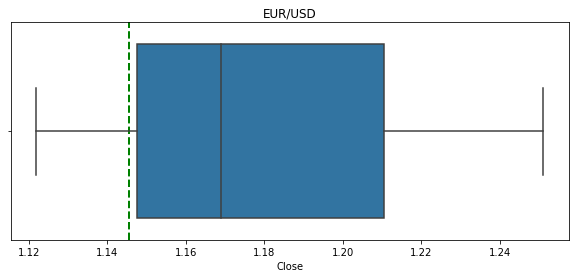

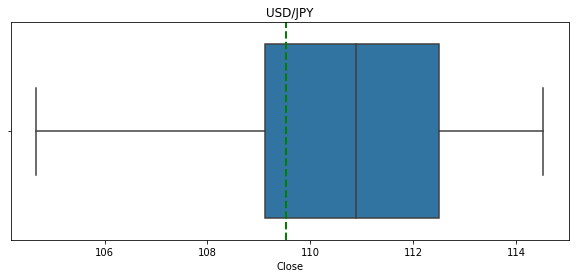

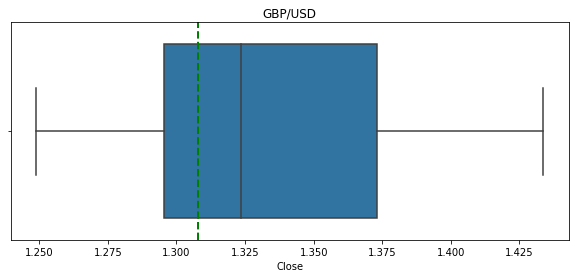

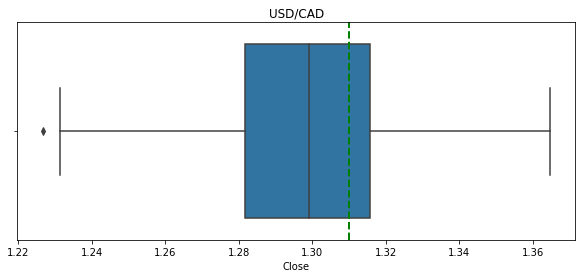

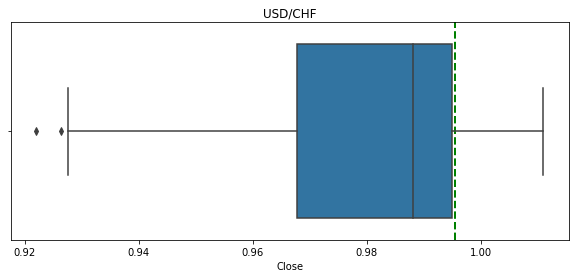

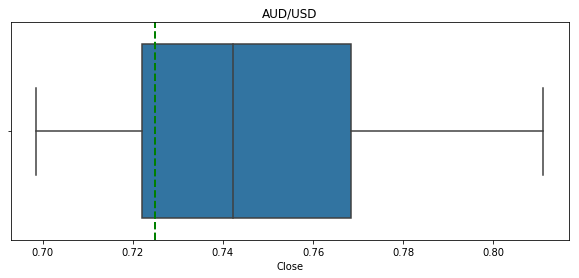

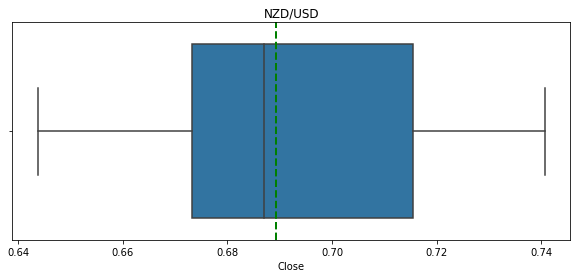

In [120]:
for symbol in symbols:
    plt.figure(figsize=(10,4))
    plt.axvline(x=last_price[symbol], color='green', linestyle='--', linewidth=2)
    plt.title(symbol)
    sns.boxplot(df[symbol]['Close'])